## Problem: Predict the class of the flower based on available attributes.

**Needed Libraries**

In [1]:
# Data Manipulation
import pandas as pd
import numpy as np

In [2]:
# Data Visualization
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

## Getting the Data 

First of all, let´s take a superficial look on the data

In [3]:
iris = sns.load_dataset('iris')

In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [6]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
iris.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

As we can see, this data cointains 4 measures (or features) of three species of flowers.

## EDA - Exploratory Data Analysis


Since our features are predominantly numerical let´s use the seaborn **pairplot** function to see if we can spot some immediate relations

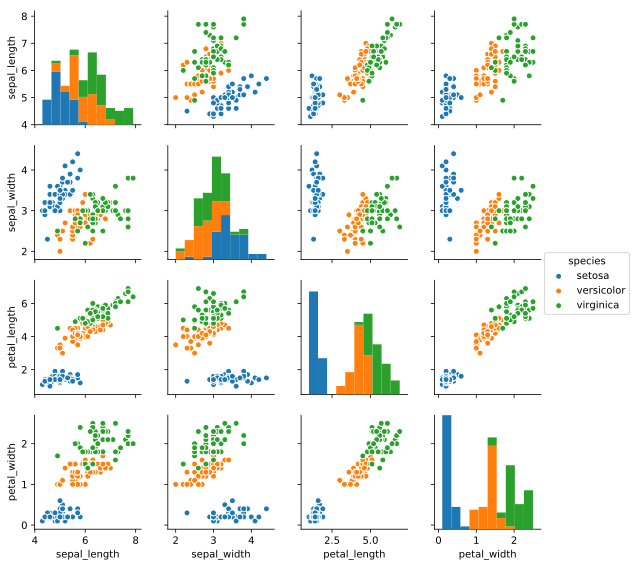

In [8]:
sns.pairplot(iris, hue='species', size=2)
plt.show()

We can notice that by some crosses, like petal_length and petal_width, the species are very separeted and distinct. Let´s colect 3 of the 4 and make a 3d dispersal to confirm that even more.

In [9]:
setosa = iris[iris.species == 'setosa']
versic = iris[iris.species == 'versicolor']
virgin = iris[iris.species == 'virginica']

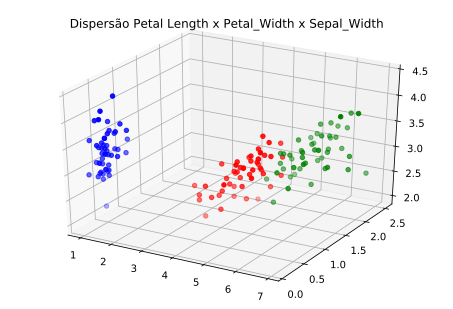

In [10]:
fig = plt.figure()
ax = Axes3D(fig)
plt.title('Dispersão Petal Length x Petal_Width x Sepal_Width')
ax.scatter(setosa.petal_length, setosa.petal_width, setosa.sepal_width, marker='o', c='b')
ax.scatter(versic.petal_length, versic.petal_width, versic.sepal_width, marker='o', c='r')
ax.scatter(virgin.petal_length, virgin.petal_width, virgin.sepal_width, marker='o', c='g')

plt.show()

Since the classes are very distinct in space, I believe that Support Vector Machine is a good model to the task

## Setting the Train and Test Data

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = iris.drop('species', axis=1)
y = iris['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Training the Model - Support Vector Machine selected

In [13]:
from sklearn.svm import SVC

In [14]:
svm_model = SVC()

In [15]:
svm_model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
iris_pred = svm_model.predict(X_test)

## Evaluating the Results

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
print(confusion_matrix(y_test, iris_pred))

[[17  0  0]
 [ 0 15  0]
 [ 0  1 12]]


In [19]:
print(classification_report(y_test, iris_pred))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        17
 versicolor       0.94      1.00      0.97        15
  virginica       1.00      0.92      0.96        13

avg / total       0.98      0.98      0.98        45



In [20]:
svm_model.predict(np.array([4.2, 3.1, 1.1, 0.8]).reshape(1,4))

array(['setosa'], dtype=object)

That´s already a very good result. But since we simply used the default parameters for or model, let´s see if we can get a 100% precision by calibrating our parameters

## Doing a "Gridsearch" and finding the best possible parameters

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000], 
              'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100], 
              'kernel': ['rbf']}

In [23]:
iris_grid = GridSearchCV(SVC(), param_grid, refit= True, verbose = 3)

In [24]:
iris_grid.fit(X_train, y_train)

Fitting 3 folds for each of 42 candidates, totalling 126 fits
[CV] C=0.01, gamma=0.0001, kernel=rbf ................................
[CV]  C=0.01, gamma=0.0001, kernel=rbf, score=0.3611111111111111, total=   0.0s
[CV] C=0.01, gamma=0.0001, kernel=rbf ................................
[CV]  C=0.01, gamma=0.0001, kernel=rbf, score=0.34285714285714286, total=   0.0s
[CV] C=0.01, gamma=0.0001, kernel=rbf ................................
[CV]  C=0.01, gamma=0.0001, kernel=rbf, score=0.35294117647058826, total=   0.0s
[CV] C=0.01, gamma=0.001, kernel=rbf .................................
[CV]  C=0.01, gamma=0.001, kernel=rbf, score=0.3611111111111111, total=   0.0s
[CV] C=0.01, gamma=0.001, kernel=rbf .................................
[CV]  C=0.01, gamma=0.001, kernel=rbf, score=0.34285714285714286, total=   0.0s
[CV] C=0.01, gamma=0.001, kernel=rbf .................................
[CV]  C=0.01, gamma=0.001, kernel=rbf, score=0.35294117647058826, total=   0.0s
[CV] C=0.01, gamma=0.01, kernel

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  C=0.1, gamma=10, kernel=rbf, score=0.35294117647058826, total=   0.0s
[CV] C=0.1, gamma=100, kernel=rbf ....................................
[CV]  C=0.1, gamma=100, kernel=rbf, score=0.3611111111111111, total=   0.0s
[CV] C=0.1, gamma=100, kernel=rbf ....................................
[CV]  C=0.1, gamma=100, kernel=rbf, score=0.34285714285714286, total=   0.0s
[CV] C=0.1, gamma=100, kernel=rbf ....................................
[CV]  C=0.1, gamma=100, kernel=rbf, score=0.35294117647058826, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV]  C=1, gamma=0.0001, kernel=rbf, score=0.3611111111111111, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV]  C=1, gamma=0.0001, kernel=rbf, score=0.34285714285714286, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV]  C=1, gamma=0.0001, kernel=rbf, score=0.35294117647058826, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf .

[Parallel(n_jobs=1)]: Done 126 out of 126 | elapsed:    0.5s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [25]:
iris_grid.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [26]:
ig_pred = iris_grid.predict(X_test)

In [27]:
print(confusion_matrix(y_test, ig_pred))

[[17  0  0]
 [ 0 15  0]
 [ 0  0 13]]


In [28]:
print(classification_report(y_test, ig_pred))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        17
 versicolor       1.00      1.00      1.00        15
  virginica       1.00      1.00      1.00        13

avg / total       1.00      1.00      1.00        45

